In [47]:
import math
import shutil
import neat
import os
import visualize
from cart_pole_simulation import run_cart_pole_simulation
from math import log

In [55]:
def eval_fitness(net, num_episodes=5, max_timesteps=1000, visualize=False):
    steps = run_cart_pole_simulation(net, num_episodes, max_timesteps, visualize)
    fitness = 1.0 - (log(max_timesteps) - log(steps)) / log(max_timesteps)
    return fitness

In [56]:
def eval_genomes(genomes, config, num_episodes=5, max_timesteps=1000, visualize=False):
    for id, genome in genomes:
        genome.fitness = 0.0
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        genome.fitness = eval_fitness(net, num_episodes, max_timesteps, visualize)

 95      0.8    0.332   261
     2  181    55      0.8    0.422   180
Total extinctions: 0
Generation time: 1.564 sec (1.499 average)

 ****** Running generation 263 ****** 

Population's average fitness: 0.63084 stdev: 0.18571
Best fitness: 0.76628 - size: (1, 3) - species 1 - id 1483
Average adjusted fitness: 0.357
Mean genetic distance 2.122, standard deviation 0.977
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1  263    93      0.8    0.297   262
     2  182    57      0.8    0.417   181
Total extinctions: 0
Generation time: 1.403 sec (1.483 average)

 ****** Running generation 264 ****** 

Population's average fitness: 0.66952 stdev: 0.15472
Best fitness: 0.76628 - size: (1, 3) - species 1 - id 1483
Average adjusted fitness: 0.375
Mean genetic distance 2.077, standard deviation 0.949
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  ======

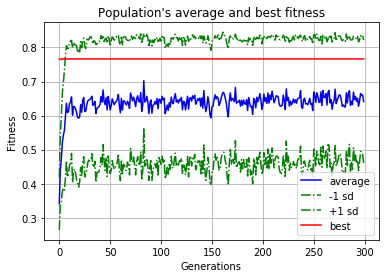

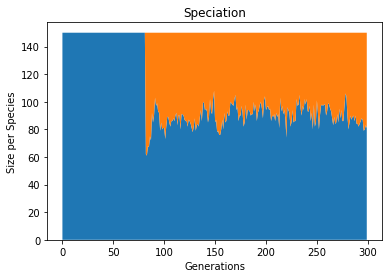

In [57]:
local_dir = os.path.abspath('')
out_dir = os.path.join(local_dir, 'out')
config_path = os.path.join(local_dir, 'config.ini')

if os.path.isdir(out_dir):
    shutil.rmtree(out_dir)

os.makedirs(out_dir, exist_ok=False)

# Run experiment
config = neat.Config(neat.DefaultGenome,
                     neat.DefaultReproduction,
                     neat.DefaultSpeciesSet,
                     neat.DefaultStagnation,
                     config_path)
max_timesteps = 1000
num_episodes = 5
num_generations = 300

p = neat.Population(config)
p.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
p.add_reporter(stats)
p.add_reporter(neat.Checkpointer(generation_interval=5, filename_prefix=os.path.join(local_dir,'out/neat-checkpoint-')))

best_genome = p.run(fitness_function=eval_genomes, n=num_generations)
best_net = neat.nn.FeedForwardNetwork.create(best_genome, config)
best_genome_fitness = eval_fitness(best_net)

if best_genome_fitness > config.fitness_threshold:
    print('\n\nSuccess: The pole-balancing controller has been found!!!')
else:
    print('\n\nFailure: Failed to find pole-balancing controller!!!')

node_names = {-1:'x', -2:'dot_x', -3:'θ', -4:'dot_θ', 0:'action'}
visualize.draw_net(config, best_genome, True, node_names=node_names, directory=out_dir)
visualize.plot_stats(stats, ylog=False, view=True, filename=os.path.join(out_dir, 'avg_fitness.svg'))
visualize.plot_species(stats, view=True, filename=os.path.join(out_dir, 'speciation.svg'))

In [58]:
eval_fitness(best_net, num_episodes=5, max_timesteps=1000, visualize=True)

0.7652623134172032